In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import warnings
import time
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
# ignore python warnings
warnings.filterwarnings("ignore")

In [3]:
seed = 101

In [3]:
featureNames = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'class']
df = pd.read_csv(r'dataset/creditcard.csv', header=None, names=featureNames)

In [5]:
k = df.describe()

In [7]:
colors = ["#00FF00", "#FF0000"]
sns.countplot('class', data=df, palette=colors)
plt.title('Class Frequency\n0: Legit\n1: Fraud', fontsize=14)

In [8]:
f, axes = plt.subplots(1, 2, figsize=(20,10))
sns.boxplot(x="class", y="Amount", data=df, ax=axes[0])
sns.boxplot(x="class", y="Time", data=df, ax=axes[1])
plt.show()

In [21]:
rows = 9
cols = 3
v = 1
f, axes = plt.subplots(rows, cols, figsize=(15,30))
for i in range(rows):
    for j in range(cols):
        if rows == 1:
            sns.boxplot(x="class", y="V"+str(v), data=df, ax=axes[j])
        elif cols == 1:
            sns.boxplot(x="class", y="V"+str(v), data=df, ax=axes[i])
        elif rows == 1 & cols == 1:
            sns.boxplot(x="class", y="V"+str(v), data=df, ax=axes)
        else:
            sns.boxplot(x="class", y="V"+str(v), data=df, ax=axes[i][j])
        v = v+1

plt.show()

## Outlier Removal
This is done via looking at the boxplot for each feature

In [9]:
def removeOutlier(df, col_name, threshold, upper=True):    
    if(upper==True):
        df = df.drop(df[(df[col_name] > threshold)].index)
    else:
        df = df.drop(df[(df[col_name] < threshold)].index)
    return df
    
df = removeOutlier(df, 'Amount', 5000)
df = removeOutlier(df, 'V3', 5)
df = removeOutlier(df, 'V3', -30, False)
df = removeOutlier(df, 'V5', -40, False)
df = removeOutlier(df, 'V6', 30)
df = removeOutlier(df, 'V7', 50)
df = removeOutlier(df, 'V8', -45, False)
df = removeOutlier(df, 'V9', 10)
df = removeOutlier(df, 'V10', 20)
df = removeOutlier(df, 'V12', 5)
df = removeOutlier(df, 'V13', 5)
df = removeOutlier(df, 'V13', -5, False)
df = removeOutlier(df, 'V15', 7)
df = removeOutlier(df, 'V15', -4, False)
df = removeOutlier(df, 'V16', 10)
df = removeOutlier(df, 'V19', -5, False)
df = removeOutlier(df, 'V20', -40, False)
df = removeOutlier(df, 'V20', 30)
df = removeOutlier(df, 'V21', 25)
df = removeOutlier(df, 'V21', -30, False)
df = removeOutlier(df, 'V22', -7.5, False)
df = removeOutlier(df, 'V22', 7.5)
df = removeOutlier(df, 'V25', -8, False)
df = removeOutlier(df, 'V27', 15)
df = removeOutlier(df, 'V27', -15, False)
df = removeOutlier(df, 'V28', 15)
df = removeOutlier(df, 'V28', -11, False)
df = df.reset_index()
df = df.drop(columns=['index'])

In [28]:
df.describe()

## Scaling
`Amount` and `Time` can now be scaled

In [13]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

## Creating sub-dataframes
Create 200 sub-dataframes consisting of the full minority samples and a group of majority samples

In [15]:
minority = df[df['class'] == 1]
majority = df[df['class'] == 0]

## Creating Model

In [67]:
# Classifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

# Parameter decider
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [69]:
# these model parameters are selected after performing GridSearchCV in the past
clf = []
clf_name = ['lr', 'svm', 'mlp', 'dt', 'knn']
clf.append(LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=seed, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False))
clf.append(SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
                decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
                kernel='rbf', max_iter=-1, probability=False, random_state=seed,
                shrinking=True, tol=0.001, verbose=False))
clf.append(MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(24,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=seed, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False))
clf.append(DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=seed, splitter='random'))
clf.append(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform'))

In [70]:
res = []
res_name = ['smote', 'bsmote', 'adasyn', 'ros', 'rus', 'tl', 'noRes']
res.append(SMOTE(random_state=seed))
res.append(BorderlineSMOTE(random_state=seed))
res.append(ADASYN(random_state=seed))
res.append(RandomOverSampler(random_state=seed))
res.append(RandomUnderSampler(random_state=seed))
res.append(TomekLinks(sampling_strategy='majority', random_state=seed))
res.append(None)

In [77]:
# 200 rounds, 5 cv, 6+1 resampling, 5 classifier
scores = [None] * 200
for cv in range(len(scores)):
    scores[cv] = [None] * 5
    for i in range(len(scores[cv])):
        scores[cv][i] = [None] * len(res)
        for j in range(len(scores[cv][i])):
            scores[cv][i][j] = [None] * len(clf)

## Assigning Model to sub-dataframe

In [79]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def GetMetrics(estimator, X, y):
    y_pred = estimator.predict(X)
    acc = accuracy_score(y, y_pred)
    pre, rec, fs, sup = precision_recall_fscore_support(y, y_pred)
    return acc, pre, rec, fs

In [81]:
#this will take approximately 6000 seconds to run
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
kf = KFold(n_splits=200, random_state=seed)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
# 95% explained variance
pca = PCA(.90)

round_index = 0
for train_index, test_index in kf.split(majority):
    time1 = time.time()
    # get data from test_index only
    new_majority = majority.iloc[test_index]
    frames = [minority, new_majority]
    new_df = pd.concat(frames)
    new_df = new_df.reset_index()
    new_df = new_df.drop(columns=['index'])
    
    X = new_df.drop(columns=['class'])
    y = new_df['class']
    cross_index = 0
    for train_index2, test_index2 in skf.split(X, y):
        X_train, X_test = X.iloc[train_index2], X.iloc[test_index2]
        y_train, y_test = y[train_index2], y[test_index2]

        pca.fit(X_train)
        X_train = pca.transform(X_train)
        X_test = pca.transform(X_test)

        for i in range(len(res)):
            if i == len(res) - 1:
                X_res, y_res = X_train, y_train
            else:
                X_res, y_res = res[i].fit_resample(X_train, y_train)
            for j in range(len(clf)):
                classifier = clf[j].fit(X_res, y_res)
                scores[round_index][cross_index][i][j] = GetMetrics(classifier, X_test, y_test)
        cross_index = cross_index + 1
    time2=time.time()
    print('round {} took {:.2f}'.format(round_index+1, time2-time1))
    round_index = round_index + 1

round 1 took 32.08
round 2 took 32.19
round 3 took 31.35
round 4 took 24.11
round 5 took 25.24
round 6 took 23.69
round 7 took 25.33
round 8 took 24.65
round 9 took 24.71
round 10 took 31.99
round 11 took 30.75
round 12 took 31.79
round 13 took 31.27
round 14 took 32.12
round 15 took 30.65
round 16 took 32.28
round 17 took 31.75
round 18 took 32.28
round 19 took 31.63
round 20 took 32.32
round 21 took 31.31
round 22 took 32.27
round 23 took 31.74
round 24 took 31.76
round 25 took 30.29
round 26 took 30.32
round 27 took 30.36
round 28 took 30.52
round 29 took 30.80
round 30 took 30.30
round 31 took 30.39
round 32 took 30.51
round 33 took 30.45
round 34 took 30.69
round 35 took 30.19
round 36 took 30.07
round 37 took 29.97
round 38 took 30.10
round 39 took 28.99
round 40 took 28.88
round 41 took 29.46
round 42 took 29.56
round 43 took 30.33
round 44 took 29.68
round 45 took 30.58
round 46 took 30.23
round 47 took 30.46
round 48 took 30.64
round 49 took 30.25
round 50 took 29.98
round 51 

In [85]:
def autolabel(rects, axes):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(), 3)
        axes.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [82]:
clf_accs = []
clf_recs = []
clf_recs_major = []
for index in range(len(clf)):
    acc = []
    rec = []
    rec_major = []
    for round_index in range(200):
        for cross in range(5):
            for i in range(len(res)):
                acc.append(scores[round_index][cross][i][index][0])
                rec.append(scores[round_index][cross][i][index][2][1])
                rec_major.append(scores[round_index][cross][i][index][2][0])
    clf_accs.append(np.mean(acc))
    clf_recs.append(np.mean(rec))
    clf_recs_major.append(np.mean(rec_major))

In [83]:
res_accs = []
res_recs = []
res_recs_major = []
for index in range(len(res)):
    acc = []
    rec = []
    rec_major = []
    for round_index in range(200):
        for cross in range(5):
            for i in range(len(clf)):
                acc.append(scores[round_index][cross][index][i][0])
                rec.append(scores[round_index][cross][index][i][2][1])
                rec_major.append(scores[round_index][cross][index][i][2][0])
    res_accs.append(np.mean(acc))
    res_recs.append(np.mean(rec))
    res_recs_major.append(np.mean(rec_major))

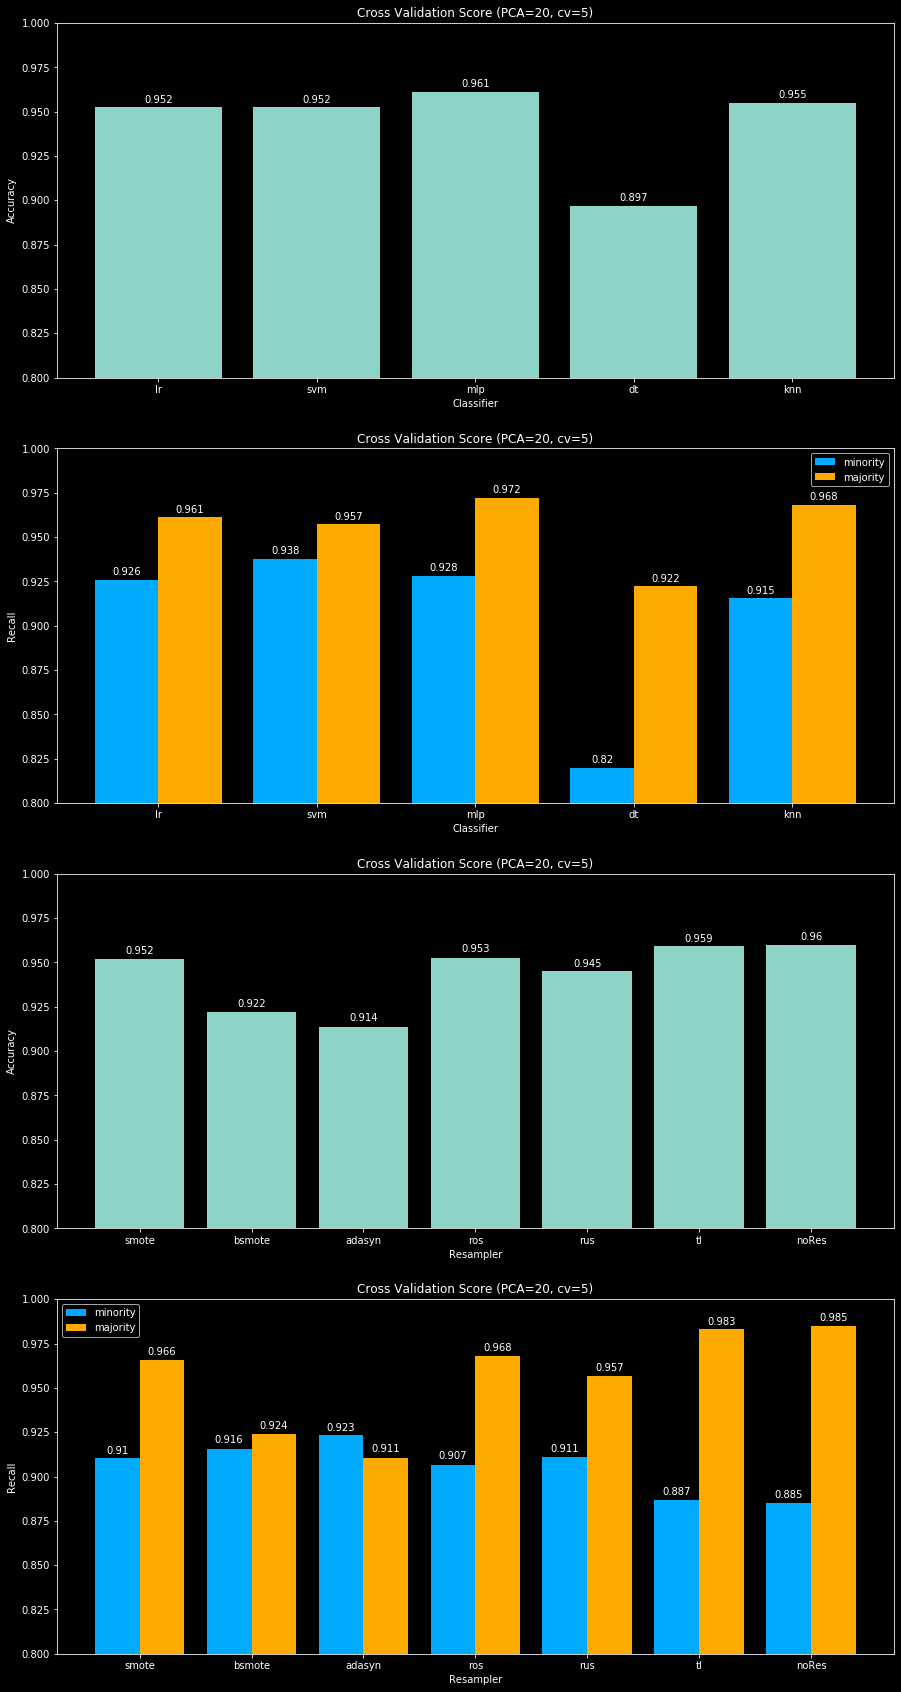

In [95]:
width = 0.40 

x = np.arange(len(clf_name))

fig, ax = plt.subplots(4,1, figsize=(15,30))

# first plot
rect = ax[0].bar(clf_name, clf_accs)
ax[0].axes.set_ylim(0.8, 1)
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Classifier')
ax[0].set_title('Cross Validation Score (PCA=20, cv=5)')
autolabel(rect, ax[0])

# second plot
rect = ax[1].bar(x-width/2, clf_recs, width=width, label='minority', color='#00aaff')
rect2 = ax[1].bar(x+width/2, clf_recs_major, width=width, label='majority', color='#ffaa00')
ax[1].axes.set_ylim(0.8, 1)
ax[1].set_title('Cross Validation Score (PCA=20, cv=5)')
ax[1].set_ylabel('Recall')
ax[1].set_xlabel('Classifier')
ax[1].set_xticks(x)
ax[1].set_xticklabels(clf_name)
ax[1].legend()
autolabel(rect, ax[1])
autolabel(rect2, ax[1])

x = np.arange(len(res_name))

# third plot
rect = ax[2].bar(res_name, res_accs)
ax[2].axes.set_ylim(0.8, 1)
ax[2].set_ylabel('Accuracy')
ax[2].set_xlabel('Resampler')
ax[2].set_title('Cross Validation Score (PCA=20, cv=5)')
autolabel(rect, ax[2])

# fourth plot
rect = ax[3].bar(x-width/2, res_recs, width=width, label='minority', color='#00aaff')
rect2 = ax[3].bar(x+width/2, res_recs_major, width=width, label='majority', color='#ffaa00')
ax[3].axes.set_ylim(0.8, 1)
ax[3].set_title('Cross Validation Score (PCA=20, cv=5)')
ax[3].set_ylabel('Recall')
ax[3].set_xlabel('Resampler')
ax[3].set_xticks(x)
ax[3].set_xticklabels(res_name)
ax[3].legend()
autolabel(rect, ax[3])
autolabel(rect2, ax[3])

In [103]:
index = tuple()
best_score = 0
metric_index = 3 # 0 for accuracy, 1 for precision, 2 for recall, 3 for f1-score
for i in range(len(res)):
    for j in range(len(clf)):
        score = []
        for round_index in range(200):
            for cross in range(5):
                if metric_index == 0:
                    score.append(scores[round_index][cross][i][j][0])
                else:
                    score.append(scores[round_index][cross][i][j][metric_index][1])
        if np.mean(score) > best_score:
            index = (i, j)
            res_index = i
            clf_index = j
            best_score = np.mean(score)

In [104]:
metrics = ['accuracy', 'precision', 'recall', 'f1-score']
majority_scores = []
minority_scores = []

for i in range(len(metrics)):
    majority_cv_score = []
    minority_cv_score = []
    for round_index in range(200):

        for j in range(5):
            if i == 0:
                majority_cv_score.append(scores[round_index][j][res_index][clf_index][0])
                minority_cv_score.append(scores[round_index][j][res_index][clf_index][0])
            else:
                majority_cv_score.append(scores[round_index][j][res_index][clf_index][i][0])
                minority_cv_score.append(scores[round_index][j][res_index][clf_index][i][1])
    majority_scores.append(np.mean(majority_cv_score))
    minority_scores.append(np.mean(minority_cv_score))
    
    

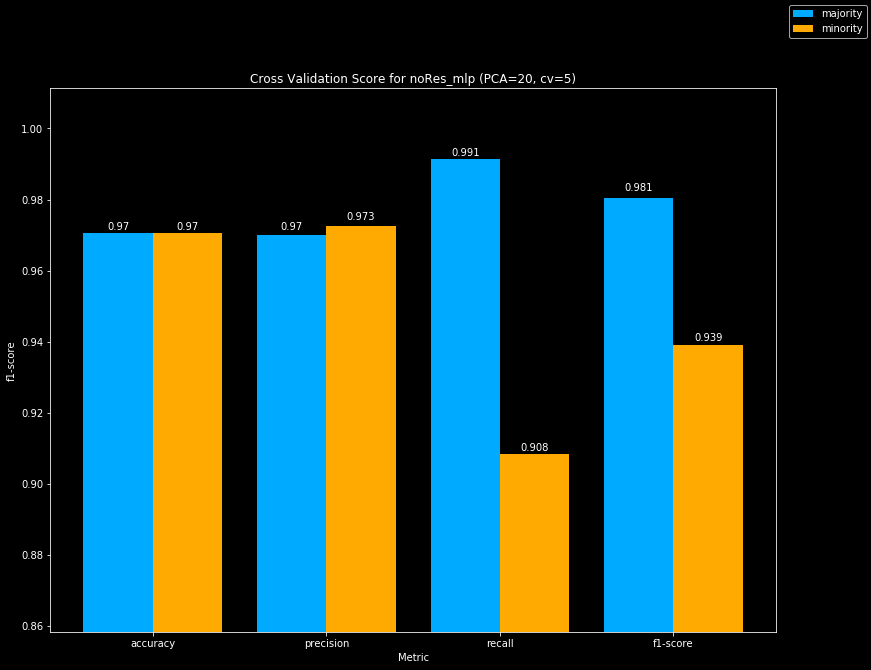

In [105]:
width = 0.40 

x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(13,10))


rect = ax.bar(x - width/2, majority_scores, width=width, label='majority', color='#00aaff')
rect2 = ax.bar(x + width/2, minority_scores, width=width, label='minority', color='#ffaa00')
ax.axes.set_ylim(np.min(minority_scores)-0.05, np.min(np.max(majority_scores)+0.02), 1.0)
ax.set_ylabel(metrics[metric_index])
ax.set_xlabel('Metric')
ax.set_title('Cross Validation Score for {}_{} (PCA=20, cv=5)'.format(res_name[res_index], clf_name[clf_index]))
ax.set_xticks(x)
ax.set_xticklabels(metrics)
autolabel(rect, ax)
autolabel(rect2, ax)
fig.legend()

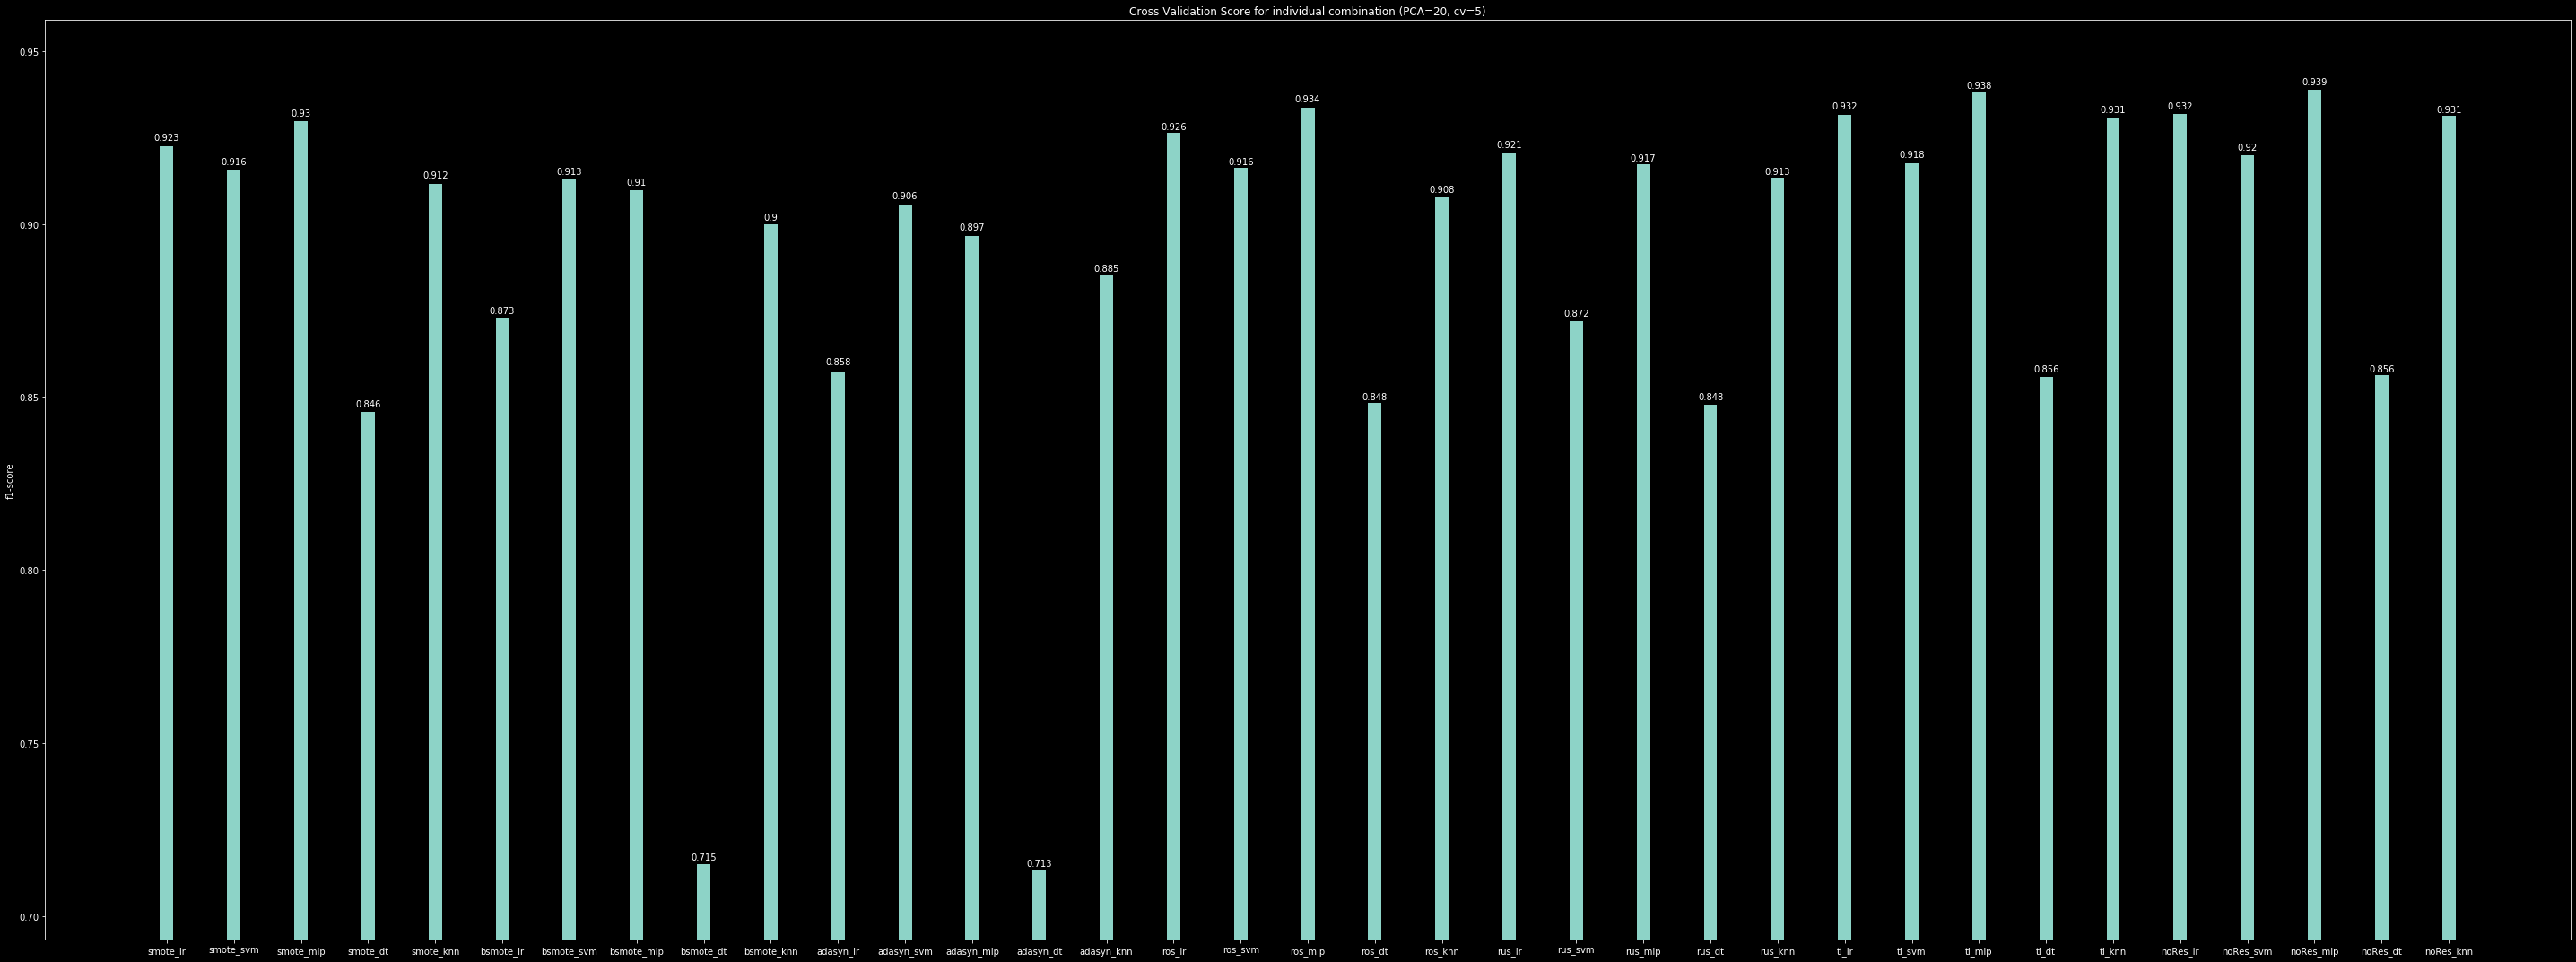

In [106]:
names = []
combinations = []
for i in range(len(res)):
    for j in range(len(clf)):
        names.append(res_name[i]+"_"+clf_name[j])
        score = []
        for round_index in range(200):
            for cross in range(5):
                if metric_index == 0:
                    score.append(scores[round_index][cross][i][j][metric_index])
                else:
                    score.append(scores[round_index][cross][i][j][metric_index][1])
        combinations.append(np.mean(score))
fig, ax = plt.subplots(figsize=(40,15))
x = np.arange(len(names))
width = 0.2 

labels = names
rect = ax.bar(x, combinations, width)
ax.set_ylabel(metrics[metric_index])
ax.set_title('Cross Validation Score for individual combination (PCA=20, cv=5)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.axes.set_ylim(np.min(combinations)-0.02, np.min(np.max(combinations)+0.02), 1.0)
fig.tight_layout()
autolabel(rect, ax)